# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
## Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city.replace(' ', '+')}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%m/%d/%y,%H:%M:%S")
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | allapalli
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hualmay
Processing Record 5 of Set 1 | mocuba
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | leshukonskoye
Processing Record 22 of Set 1 | chuy
Process

Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | mitu
Processing Record 40 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | moranbah
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | media luna
Processing Record 46 of Set 4 | al
City not found. Skipping...
Processing Record 47 of Set 4 | yuci
Processing Record 48 of Set 4 | raymondville
Processing Record 49 of Set 4 | ponta do sol
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | juquia
Processing Record 2 of Set 5 | bahia blanca
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | sur
Processing Record 8 of Set 5 | busca
Processing Record 9 of Se

Processing Record 27 of Set 8 | rocky river
Processing Record 28 of Set 8 | chumikan
Processing Record 29 of Set 8 | muisne
Processing Record 30 of Set 8 | playa vicente
Processing Record 31 of Set 8 | panguna
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | krasnoselkup
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | brownwood
Processing Record 37 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 38 of Set 8 | khandbari
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | praya
Processing Record 42 of Set 8 | vieux-habitants
Processing Record 43 of Set 8 | alamosa
Processing Record 44 of Set 8 | muros
Processing Record 45 of Set 8 | mercedes
Processing Record 46 of Set 8 | rochester
Processing Record 47 of Set 8 | pombia
Processing Record 48 of Set 8 | saint-augustin
Processing Record 49 of Set 8 | poya
Processing 

Processing Record 15 of Set 12 | oksbol
Processing Record 16 of Set 12 | hays
Processing Record 17 of Set 12 | bibiani
Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | atar
Processing Record 20 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 12 | macas
Processing Record 22 of Set 12 | hay river
Processing Record 23 of Set 12 | grand-santi
Processing Record 24 of Set 12 | labytnangi
Processing Record 25 of Set 12 | krasnokamensk
Processing Record 26 of Set 12 | atbasar
Processing Record 27 of Set 12 | xam nua
Processing Record 28 of Set 12 | saint-jean-port-joli
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | chiali
City not found. Skipping...
Processing Record 31 of Set 12 | paamiut
Processing Record 32 of Set 12 | monrovia
Processing Record 33 of Set 12 | chengde
Processing Record 34 of Set 12 | santa isabel do rio negro
Processing Record 35 of Set 12 | domoni
Processing Record 36 of Set 12 | najran
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,allapalli,19.4167,80.0667,15.81,25,0,1.02,IN,"02/14/23,23:23:58"
1,upernavik,72.7868,-56.1549,-28.51,93,100,2.51,GL,"02/14/23,23:20:00"
2,vaini,-21.2000,-175.2000,26.09,100,75,2.57,TO,"02/14/23,23:23:59"
3,hualmay,-11.0964,-77.6139,23.45,83,98,2.03,PE,"02/14/23,23:23:59"
4,mocuba,-16.8392,36.9856,23.47,94,95,1.54,MZ,"02/14/23,23:24:00"


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("./plt_folder/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("./plt_folder/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,15.81,25,0,1.02,IN,"02/14/23,23:23:58"
1,upernavik,72.7868,-56.1549,-28.51,93,100,2.51,GL,"02/14/23,23:20:00"
2,vaini,-21.2000,-175.2000,26.09,100,75,2.57,TO,"02/14/23,23:23:59"
3,hualmay,-11.0964,-77.6139,23.45,83,98,2.03,PE,"02/14/23,23:23:59"
4,mocuba,-16.8392,36.9856,23.47,94,95,1.54,MZ,"02/14/23,23:24:00"


## Create the Scatter Plots Requested
## Latitude Vs. Temperature

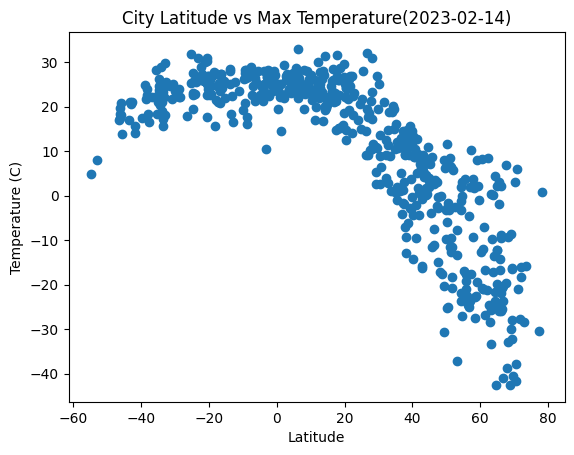

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature" + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("./plt_folder/Fig1.png")

# Show plot
plt.show()


## Latitude Vs. Humidity

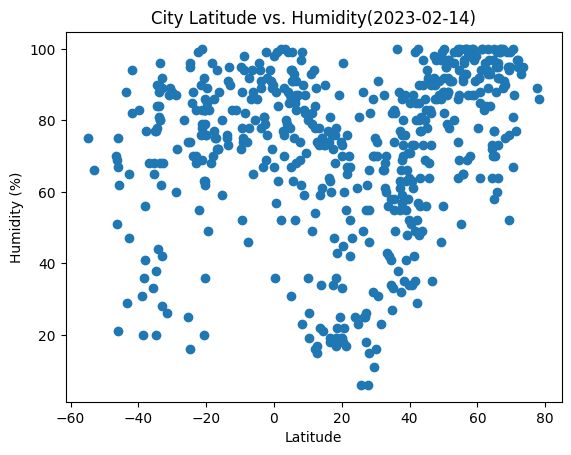

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity"  + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./plt_folder/Fig2.png")

# Show plot
plt.show()

## Latitude Vs. Cloudiness

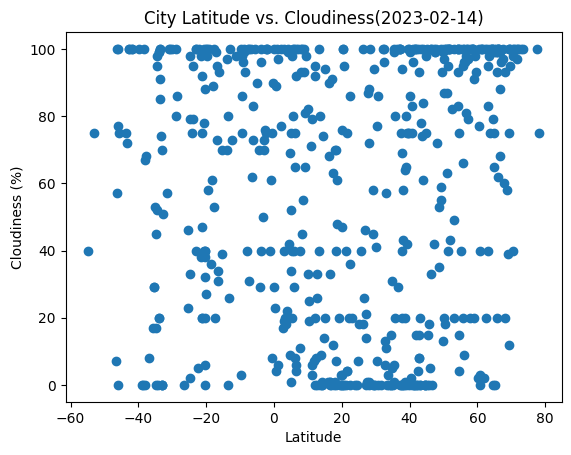

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness"  + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("./plt_folder/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

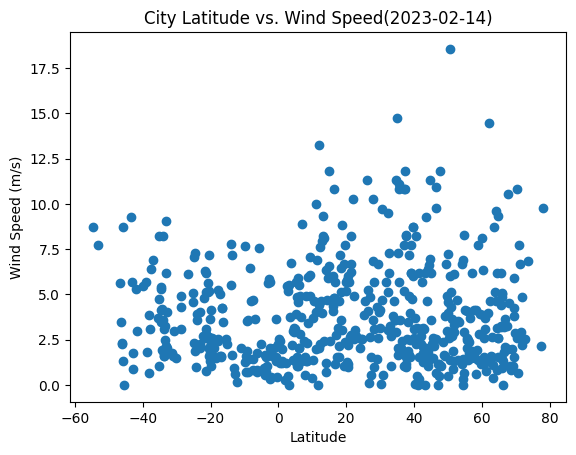

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed"  + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("./plt_folder/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linearregression(x, y):
    (slope, intercept, r, p, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x_values,regress_values, color='darkred', linewidth=2)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,15.81,25,0,1.02,IN,"02/14/23,23:23:58"
1,upernavik,72.7868,-56.1549,-28.51,93,100,2.51,GL,"02/14/23,23:20:00"
5,yellowknife,62.4560,-114.3525,-24.69,84,20,4.63,CA,"02/14/23,23:24:00"
6,kapaa,22.0752,-159.3190,26.99,70,20,10.29,US,"02/14/23,23:24:01"
7,jamestown,42.0970,-79.2353,8.80,29,0,3.09,US,"02/14/23,23:24:01"


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vaini,-21.2000,-175.2000,26.09,100,75,2.57,TO,"02/14/23,23:23:59"
3,hualmay,-11.0964,-77.6139,23.45,83,98,2.03,PE,"02/14/23,23:23:59"
4,mocuba,-16.8392,36.9856,23.47,94,95,1.54,MZ,"02/14/23,23:24:00"
8,atuona,-9.8000,-139.0333,26.26,72,3,7.65,PF,"02/14/23,23:24:02"
9,rikitea,-23.1203,-134.9692,26.34,68,100,2.26,PF,"02/14/23,23:24:03"


## Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.74


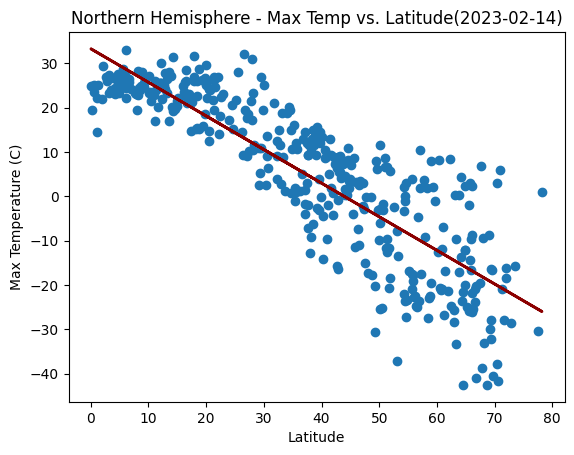

In [15]:
# Linear regression on Northern Hemisphere

# Build scatter plot for each data type
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude'  + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(1, -50), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig5.png')

# Show plot:
plt.show()


The r-squared is: 0.22


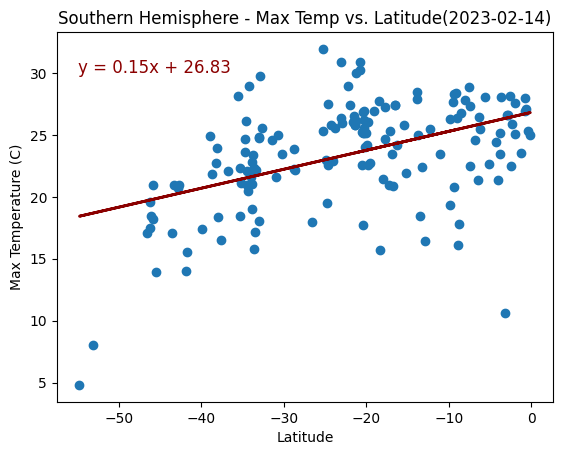

In [16]:
# Linear regression on Southern Hemisphere

# Build scatter plot for each data type
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55, 30), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig6.png')

# Show plot:
plt.show()

### Discussion about the linear relationship:

The cities in the Northern Hemisphere have a moderately strong linear relationship between their max temp and latitude as shown by the value of 0.67. 

The the cities in the Southern Hemisphere have a minimal linear relationship between their max temp and latitude as shown by the value of 0.15. 

## Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14


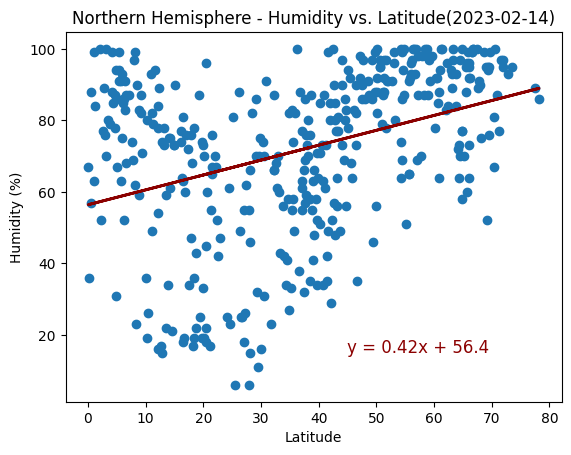

In [17]:
# Northern Hemisphere

# Build scatter plot for each data type
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(45, 15), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig7.png')

# Show plot:
plt.show()

The r-squared is: 0.15


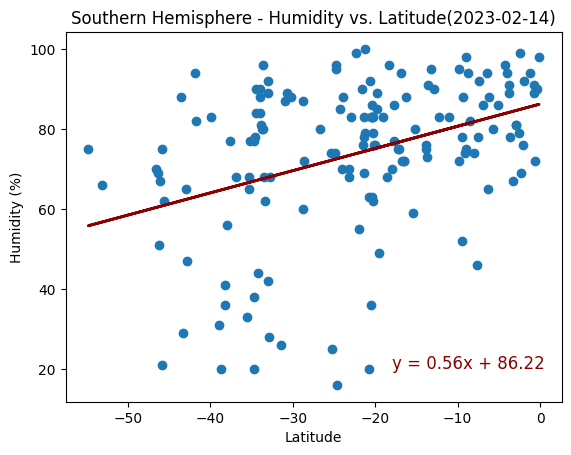

In [18]:
# Southern Hemisphere
# Build scatter plot for each data type
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-18, 20), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig8.png')

# Show plot:
plt.show()

### Discussion about the linear relationship:

The Northern Hemisphere had a value of 0.21 and the Southern Hemisphere had a value of 0.11. 

This shows a moderate minimal relationship. 

## Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1


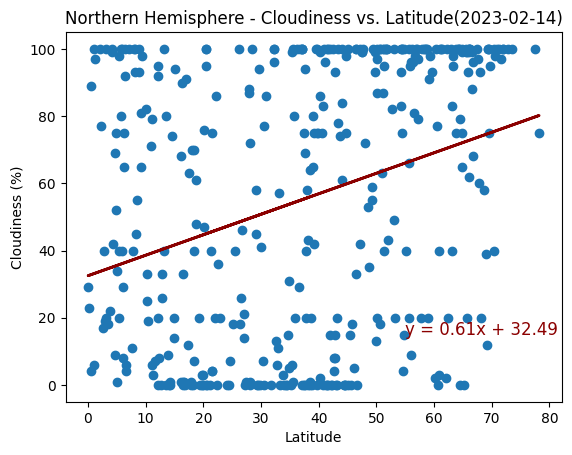

In [19]:
# Northern Hemisphere
# Build scatter plot for each data type
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(55, 15), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig9.png')

# Show plot:
plt.show()

The r-squared is: 0.03


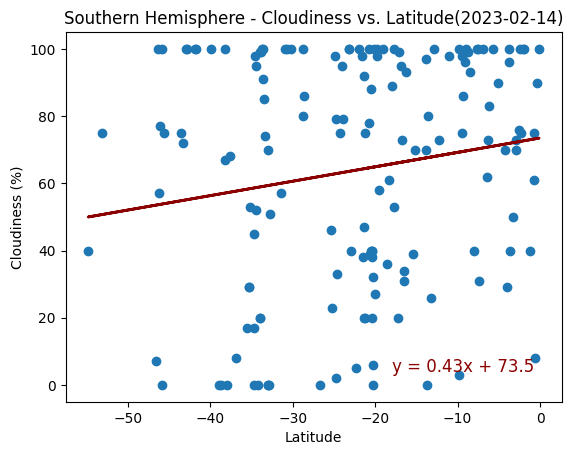

In [20]:
# Southern Hemisphere
# Build scatter plot for each data type
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-18, 4), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig10.png')

# Show plot:
plt.show()

## Discussion about the linear relationship:

The Northern Hemisphere had a value of 0.07 and the Southern Hemisphere had a value of 0.14. 

This shows a minimal linear relationship. 

## Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


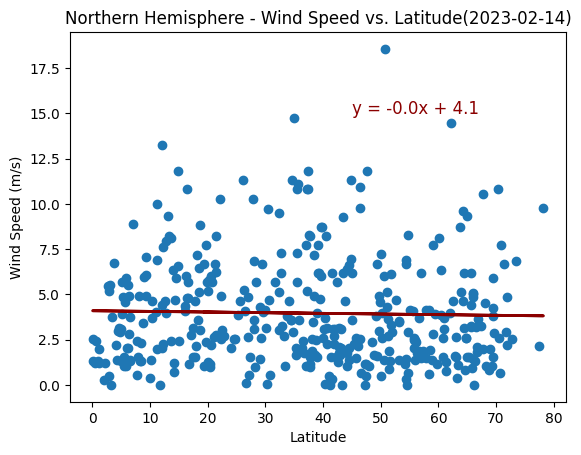

In [21]:
# Northern Hemisphere
# Build scatter plot for each data type
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(45, 15), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig11.png')

# Show plot:
plt.show()

The r-squared is: 0.09


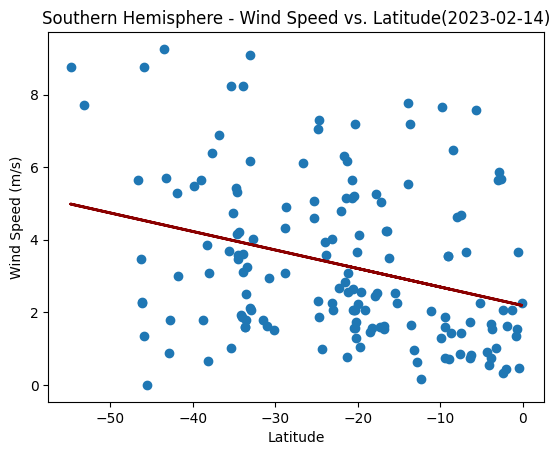

In [22]:
# Southern Hemisphere
# Build scatter plot for each data type
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression for temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
linearregression(x_values, y_values)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude'   + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-30, 10), fontsize=12, color='darkred')

# Print the r-squared value
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('./plt_folder/Fig12.png')

# Show plot:
plt.show()


## Discussion about the linear relationship:

The Northern Hemisphere had a value of 0.00 and the Southern Hemisphere had a value of 0.12.

This shows a minimal linear relationship.